### Import packages and libraries

In [1]:
! pip install xgboost

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import numpy as np
import pandas as pd
from sklearn import metrics, ensemble
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import pickle
import matplotlib.pyplot as plt


import os
import warnings
warnings.filterwarnings('ignore')

os.system('mkdir plot')
os.system('mkdir model')

0

  ### Data exploration

In [4]:
#dataset
data = '/content/drive/MyDrive/ACME-HappinessSurvey2020.csv'


In [5]:
df = pd.read_csv(data)
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


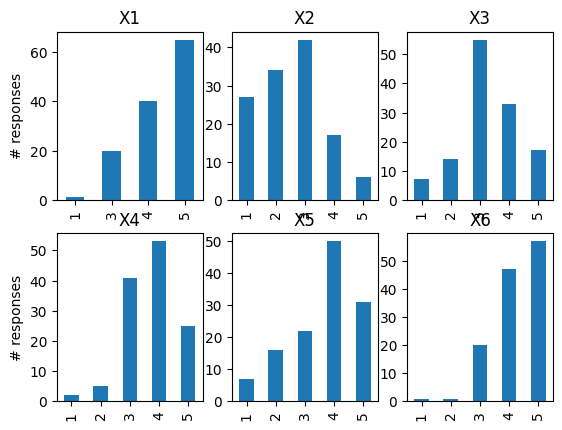

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3)
df['X1'].value_counts().sort_index(ascending=True).plot(kind='bar', ylabel='# responses', title='X1', ax=axes[0,0])
df['X2'].value_counts().sort_index(ascending=True).plot(kind='bar', title='X2', ax=axes[0,1])
df['X3'].value_counts().sort_index(ascending=True).plot(kind='bar', title='X3', ax=axes[0,2])
df['X4'].value_counts().sort_index(ascending=True).plot(kind='bar', ylabel='# responses', title='X4', ax=axes[1,0])
df['X5'].value_counts().sort_index(ascending=True).plot(kind='bar', title='X5', ax=axes[1,1])
df['X6'].value_counts().sort_index(ascending=True).plot(kind='bar', title='X6', ax=axes[1,2])

plt.savefig('plot/data_exploration.pdf', bbox_inches='tight')

### Pre-processing training data

In [12]:
random_state=69
x_train, x_test, y_train, y_test = train_test_split(df[["X1", "X2", "X3", "X4", "X5", "X6"]].values,
                                              (df.Y).values, test_size=0.2, random_state=random_state)

features=["X1","X2","X3","X4","X5","X6"]


##Running random forest

In [9]:
rfc_clas = RandomForestClassifier(random_state=random_state)
rfc_clas.fit(x_train, y_train)
y_true, y_pred = y_test, rfc_clas.predict(x_test)
rfacc = metrics.accuracy_score(y_true, y_pred)
print("Random forest accuracy: ",rfacc)

Random forest accuracy:  0.6153846153846154


##Plotting feature importance

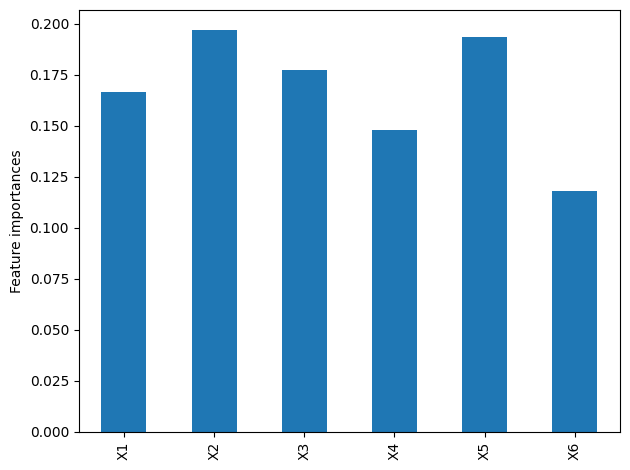

In [22]:
importances = rfc_clas.feature_importances_
forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_ylabel("Feature importances")
fig.tight_layout()
plt.savefig('plot/feature_importance.pdf', bbox_inches='tight')
#for i in range(len(features)):
#  print(features[i],importances[i])

##Running XGBoost

In [27]:
xgb_clas = XGBClassifier(random_state=random_state)
xgb_clas.fit(x_train, y_train)
y_true, y_pred = y_test, xgb_clas.predict(x_test)
xgacc = metrics.accuracy_score(y_true, y_pred)
print("XGBoost accuracy: ", xgacc)

XGBoost accuracy:  0.7692307692307693


##Saving model

In [29]:
with open("model/xgboost_model.pkl", 'wb') as f:
            pickle.dump(
                xgb_clas,
                f,
                pickle.HIGHEST_PROTOCOL)